#### Module 14: Model Selection and Boosting

#### Case Study–2

Objectives:

• Learn to use Cross-validation to pick the best models.

Questions:

1. Load the data from “glass.csv” and make a bar plot of different types of glasses.
2. Make a train_test split and fit a single decision tree classifier.
3. Make a k-fold split with 3 splits and measure the accuracy score with each split
[Hint: Refer to KFold module under sklearn’s model selection.]
4. Use gridSearchCV from sklearn for finding out a suitable number of estimators
for a RandomForestClassifer along with 10-fold cross-validation.
[Hint: Define a range of estimators and feed in range as param_grid]

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
Columns: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


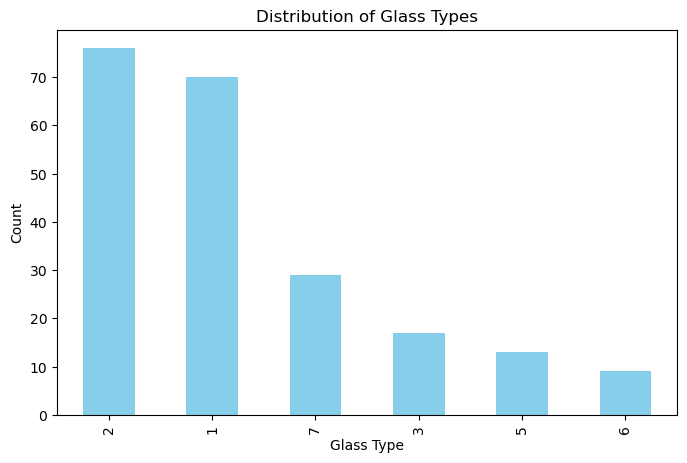

Decision Tree Accuracy: 0.6976744186046512
K-Fold Accuracy Scores: [0.69444444 0.69014085 0.67605634]
Mean Accuracy: 0.6868805425143453
Best Parameters: {'n_estimators': 10}
Best CV Accuracy: 0.7473290598290598


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("glass.csv")

# Inspect columns
print(df.head())
print("Columns:", df.columns)

target_col = "Type"
X = df.drop(columns=[target_col])
y = df[target_col]

# Bar plot of different glass types
plt.figure(figsize=(8,5))
y.value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel("Count")
plt.show()

# Train-test split and fit Decision Tree
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

# K-Fold cross-validation (3 splits)
kf = KFold(n_splits=3, shuffle=True, random_state=42)
scores = cross_val_score(dt_model, X, y, cv=kf, scoring='accuracy')
print("K-Fold Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

# GridSearchCV for RandomForest with 10-fold CV
param_grid = {'n_estimators': [10, 50, 100, 200]}
rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    rf_model, param_grid, cv=8, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)
